# Deep Learning Homework 4


-----------------------------------


**Start date:** *13th March 2018*

**Due date:** *29th March 2018, 11:55 pm*

------------------------------------

## How to Submit

When you have completed the exercises and everything has finsihed running, click on 'File' in the menu-bar and then 'Download .ipynb'. This file must be submitted to Moodle named as **studentnumber_DL_hw4.ipynb** before the deadline above.

Also send a **sharable link** to the notebook at the following email: ucl.coursework.submit@gmail.com. You can also make it sharable via link to everyone, up to you.

Please compile all results, all plots/figures and all answers to the understanding/analysis results questions into a PDF. Name convention: **studentnumber_DL_hw4.pdf**. Do not include any of the code (we will use the notebook for that). 

**Page limit: 15 pg **.

------------------------------------

## PART 1: MNIST as a sequence (follow-up from last assignment)
In this assignment we will be using the [MNIST digit dataset](https://yann.lecun.com/exdb/mnist/). The dataset contains images of hand-written digits ($0-9$), and the corresponding labels. The images have a resolution of $28\times 28$ pixels. This is the same dataset as in Assignment 1, but we will be using this data a bit differently this time around. Since this assignment will be focusing on recurrent networks that model sequential data, we will be looking at each image as a sequence: the networks you train will be "reading" the image one row at a time, from top to bottom (we could even do pixel-by-pixel, but in the interest of time we'll do row-by-row which is faster).  Also, we will work with a binarized version of MNIST -- we constrain the values of the pixels to be either $0$ or $1$. You can do this by applying the method `binarize`, defined below, to the raw images.

<img src="https://github.com/bodono/files/blob/master/mnist_as_sequence.png?raw=true">

* We take the MNIST images, binarise them, and interpret them as a sequence of pixels from top-left to bottom-right. ("Task 2" refers to the next homework, wherein you will be using the sequence for pixel prediction).

## Recurrent Models for MNIST

As discussed in the lectures, there are various ways and tasks for which we can use recurrent models. A depiction of the most common scenarios is available in the Figure below. In this assignment and the following one we will look at two of these forms: **many-to-one** (sequence to label/decision) and the **many-to-many** scenario where the model receives an input and produces an output at every time step. You will use these to solve the following tasks: i) pixel prediction  and ii) in-painting.

<img src="https://github.com/bodono/files/blob/master/rnn_models.png?raw=true">
* ([Figure adapted from Karpathy's The Unreasonable Effectiveness of Recurrent Neural Networks](http://karpathy.github.io/2015/05/21/rnn-effectiveness)). You will be implementing variants of *many-to-one* for classification (in this homework), and *many-to-many* for prediction (in the next homework).


## Task 1: (Next) Pixel prediction (35 pts)
In this part, you will train a **many-to-many** recurrent model: at each time $t$, the model receives as input a pixel value $x_t$ and tries to predict the next pixel in the images $x_{t+1}$ based on the current input and the recurrent state. Thus, your output function is now a probability over the value of pixel $x_{t+1}$ -- which can be either $0$ or $1$ (black or white).
\begin{equation}
    \hat{p}(x_{t+1}|x_{1:t}) = g(x_{t}, h_{t}, c_{t})
\end{equation}
Once we get to observe the actual value of $x_{t+1}$ at the next time-step, we can compute the cross-entropy between our predicted probability $\hat{p}(x_{t+1}|x_{1:t})$ and the observed value (pixel in the image). We can (and will) do that for every time-step prediction within a sequence. This will provide us with the training signal for optimizing the parameters of the mapping $g$ and the recurrent connections -- remember these are shared!, they do not change with $t$.





### Optimization
Use the Adam optimizer (with default settings other than the learning rate) for training.

**[Optional]** Sometimes dropout has been shown to be beneficial in training recurrent models, so feel free to use it or any other form of regularization that seems to improve performance. It might be also worth trying out batch-normalization. [Reference](https://arxiv.org/pdf/1603.09025.pdf).

### Models: Your models will have the following structure:
1. [(Red Block)] The *input* (current binarised row of pixels) can be fed directly into the recurrent connection without  much further pre-processing.
2. [(Blue Block)] The *output* (probabilities over the activation of the pixel) is produced by looking at the last output of the recurrent units, transforming them via an affine transformation.
3. [(Green Block)] For the *recurrent* part of the network, please implement and compare the following architectures:
    * LSTM with 32 units. **[15 pts]**
    
    **OR**
    
    * GRU with 32 units. **[15 pts]**

Your network should look like:
\begin{equation}
\textrm{Input} \Rightarrow \textrm{RNN cell} \Rightarrow \textrm{Relu} \Rightarrow \textrm{Fully connected} \Rightarrow \textrm{Relu} \Rightarrow \textrm{Fully connected} \Rightarrow \textrm{Output}
\end{equation}
You might find the function `tf.nn.dynamic_rnn` useful.

### Hyper-parameters 
For all cases train the model with these hyper-parameter settings:

- *num_epochs*=5, *learning_rate*=0.001, *batch_size*=256, *fully_connected_hidden_units=64*

With these hyper-parameters you should give you a good perfomance on both GRUs/LSTMs. It is worth noting that in $5$ epochs the model has yet converged, but in the interest of time (the training should have $\approx$ 1h). That being said, feel free to try other settings, there are certainly better choices, but please report the results with these exact hyper-parameters and/or train for longer -- the models should still improve (convergence is achieved around 25-30 epochs). 

### Tasks:

1) Implement and train the previously described model (choose either GRU **or** LSTM). Please report the *cross-entropy* on the *test set* and *training set* of the models trained. Use the `plot_summary_table` method below to format the table. Provide the learning curves (both training and testing loss) -- choose appropiate reporting interval here (at least 20 points).

2) Using the previously trained model, visualize the 1-step predictions, 10-step predictions, one row prediction (28 steps) and filling out the image (fill out all the pixels using the recurrent model). 

*   **Generate a small in-painting dataset.** Sample $100$ images from your test set. Mask/Remove the last $300$ pixels (roughly 10 rows and a half).

*   **Predict missing parts and compare with GT**. Given the above generated partial sequences as input to your train models, generate the continuation of these masked images (for the next 1, 10, 28, 300 pixels).
Report the cross-entropy of your in-paintings for the trained model at beginning of training(0 epochs), after 1 epoch and at the end of training. Discuss the results: contrasting long/short time prediction; compare these with the cross-entropy of the ground truth images. For multiple steps in-paintings, average the loss over $10$ samples. **[10 pts]**

*   **Visualize completing the image**. Pick out $3$ examples from your in-painting dataset to visualize  the resulting images -- this can be done at random, but should include *a successful example, failure example and one that displays high variance between samples.* For each example picked, please provide $5$ samples for the last three scenarios (10, 28, 300 pixels) and $1$ for the 1-pixel prediction -- total 16 samples/exampls. The samples should be generated recursively by sampling the generative process provided by the trained recurrent connections. Total number of in-painting to report: 16 samples x 3 examples = 48 **[10 pts]**



## Task 2: Using pixel-to-pixel: In-painting task (25 pts)

Using the models trained in the previous section, please in-paint the missing pixels in the following datasets:
* [One-pixel missing](https://github.com/dianaborsa/compgi22_dl_cw4/blob/master/one_pixel_inpainting.npy)
* [Window of 2x2 pixels missing](https://github.com/dianaborsa/compgi22_dl_cw4/blob/master/2X2_pixels_inpainting.npy)

This is similar to Task 1.b, but now you have information not only about the past(previous pixels in the image) but also future (pixels that come after your predictive target)

### Results
1) Provide the formula used to compute the probability over the missing pixel and respectively for the missing patch **[5+5 pts]**

2) Visualize the most probable in-painting, according to your model. How does this compare to the ground truth? (Compare cross-entropy between your most probable sample and the ground truth). Explain the difference. It is enough to include just one example per task/dataset. **[10 pts]**


### In-painting data 

We provide two datasets (one corresponing to the one-pixel in-painting tasks and the other one with a 2x2 patch missing). The datasets are available on [git](https://github.com/dianaborsa/compgi22_dl_cw4/blob/master/). Links are available in the description and code is provide below to load the dataset and visualize. Both datasets have 1000 sampled images from MNIST(test). Both dataset sets have the same simple structure: cropped images and their ground truth (GT). in this second task, you will consider the copped images and use your pixel-to-pixel model, try to predict the missing pixel/patches.


# Imports and utility functions (do not modify!)

In [0]:
#@title Import libraries
#@test {"output": "ignore"}

# Import useful libraries.
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import os
from google.colab import files

# Binarize the images
def binarize(images, threshold=0.1):
  return (threshold < images).astype('float32')

# Import dataset with one-hot encoding of the class labels.
def get_data():
  return input_data.read_data_sets("MNIST_data/", one_hot=True)

# Placeholders to feed train and test data into the graph.
# Since batch dimension is 'None', we can reuse them both for train and eval.
def get_placeholders():
  x = tf.placeholder(tf.float32, [None, 783])
  y = tf.placeholder(tf.float32, [None, 783])
  return x, y

# Generate summary table of results. This function expects a dict with the
# following structure: keys of 'LSTM' (or 'GRU') and the values for each key are a
# list of tuples consisting of (test_loss, test_accuracy), and the list is
# ordered as the results from 0 epoch (beginning of training), 1 epoch, 5 epochs (or end of training):
# {
#  'LSTM': [(loss,acc), (loss, acc), (loss, acc)]
# }
def plot_summary_table(experiment_results):
  # Fill Data.
  cell_text = []
  columns = ['(Beginning - 0 epochs)', '(Mid-training - 1 epoch)', '(End of training - 5 epochs)']
  for k, v in experiment_results.iteritems():
    rows = ['Test loss', 'Test accuracy']
    cell_text=[[],[]]
    for (l, _) in v:
      cell_text[0].append(str(l))
    for (_, a) in v:
      cell_text[1].append(str(a))

    fig=plt.figure(frameon=False)
    ax = plt.gca()
    the_table = ax.table(
      cellText=cell_text,
      rowLabels=rows,
      colLabels=columns,
      loc='center')
    the_table.scale(2, 8)
    # Prettify.
    ax.patch.set_facecolor('None')
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.text(-0.73, 0.9, k, fontsize=18)
    
    
    
def plot_learning_curves(training_loss, testing_loss):
  plt.figure()
  plt.plot(training_loss)
  plt.plot(testing_loss, 'g')
  plt.legend(['Training loss', 'Testing loss'])
   

# Train Models

Generate summary table of results. This function expects a dict with the
following structure: keys of 'LSTM' (or 'GRU') and the values for each key are a
list of tuples consisting of (test_loss, test_accuracy), and the list is
ordered as the results from 0 epoch (beginning of training), 1 epoch, 5 epochs (or end of training) i.e. expected dictionary (final performace only):

```python
{
  'LSTM': [(loss,acc), (loss, acc), (loss, acc)]
}
```

In [0]:
#@title Your models
experiment_results = {}
num_epochs=5
learning_rate=0.001
batch_size=256
#fully_connected_hidden_units=64

def LSTMRnn(x): #x:[-1,783]
  
  hidden_units = 64
  time_step = 783 #783
  n_input = 1
  lstm_size = 32
  batch_size=256
  
  initializer = tf.contrib.layers.xavier_initializer()
  fc1_w = tf.Variable(initializer([lstm_size,hidden_units]))
  fc1_b = tf.Variable(initializer([hidden_units]))
  fc2_w = tf.Variable(initializer([hidden_units,n_input]))
  fc2_b = tf.Variable(initializer([n_input]))
  
  x_ = tf.reshape(x,(-1,time_step,n_input))
  lstmcell = tf.contrib.rnn.BasicLSTMCell(lstm_size,forget_bias=1.0)
  #output:[batchsize,time_step,lstmsize]--[n,783,32]
  rnn_op,_ = tf.nn.dynamic_rnn(lstmcell,x_,dtype=tf.float32,time_major=False)
  rnn_op = tf.reshape(rnn_op,(-1,lstm_size))
  relu_op = tf.nn.relu(rnn_op) #[batch*783,lstmsize]
  fc1_op = tf.nn.relu(tf.matmul(relu_op,fc1_w)+fc1_b)#[batch*783,hidden_units]
  fc2_op = tf.matmul(fc1_op,fc2_w)+fc2_b#[batch*783,1]
  y = tf.reshape(fc2_op,[-1,783])
 
  return y
    
'''
# Advisable to you GPU for this part
with tf.device('/device:GPU:*'):

  tf.reset_default_graph()
  
  
  # your model here....  
  x, y_ = get_placeholders()
  mnist = get_data()
  eval_mnist = get_data()
  
  y = LSTMRnn(x)
  loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y_,logits=y))
  opt = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)
  correct = tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
  accuracy = tf.reduce_mean(tf.cast(correct,tf.float32))
  
'''  

"\n# Advisable to you GPU for this part\nwith tf.device('/device:GPU:*'):\n\n  tf.reset_default_graph()\n  \n  \n  # your model here....  \n  x, y_ = get_placeholders()\n  mnist = get_data()\n  eval_mnist = get_data()\n  \n  y = LSTMRnn(x)\n  loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y_,logits=y))\n  opt = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)\n  correct = tf.equal(tf.argmax(y,1),tf.argmax(y_,1))\n  accuracy = tf.reduce_mean(tf.cast(correct,tf.float32))\n  \n"

In [0]:
#@title Training
#@test {"output": "ignore"}

experiment_results = {}
num_epochs=5
learning_rate=0.001
batch_size=256
#fully_connected_hidden_units=64

experiment_results['LSTM'] = []
test_loss = []
train_loss = []



# Advisable to you GPU for this part
with tf.device('/device:GPU:*'):

  tf.reset_default_graph()
  
  
  # your model here....  
  x, y_ = get_placeholders()
  mnist = get_data()
  eval_mnist = get_data()
  
  y = LSTMRnn(x)
  #y[-1,783,1]
  loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y_,logits=y))
  #loss = -tf.reduce_mean(y_*tf.log(y))
  opt = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)
  y_sig = tf.sigmoid(y)
  correct = tf.equal(tf.to_float(y_sig>0.5),y_)
  accuracy = tf.reduce_mean(tf.cast(correct,tf.float32))

  i = 0
  train_size = len(mnist.train.images)
  batch_step = train_size/batch_size
  test_xs = binarize(eval_mnist.test.images)
  te_x = test_xs[:,:783]
  te_y = test_xs[:,-783:]
  train_xs = binarize(mnist.train.images)
  tr_x = train_xs[:,:783]
  tr_y = train_xs[:,-783:]
  index = np.random.randint(0,train_size,size=10000)
  saver = tf.train.Saver()
  
  init = tf.global_variables_initializer()
    
      
  with tf.Session() as sess:    
      #with tf.train.MonitoredSession() as sess:  
      sess.run(init)
      while mnist.train.epochs_completed < num_epochs:        
        c = mnist.train.epochs_completed        
        batch_xs,batch_ys = mnist.train.next_batch(batch_size)   
        batch_xs = binarize(batch_xs)        
        sess.run(opt,feed_dict={x:batch_xs[:,:783],y_:batch_xs[:,-783:]})
        i += 1        
        if i%50==0:
          print('epoch:'+str(c)+'--'+str(i))             
          tr_xs = tr_x[index,:]
          tr_ys = tr_y[index,:]
          test_loss.append(sess.run(loss,feed_dict={x:te_x,y_:te_y}))         
          train_loss.append(sess.run(loss,feed_dict={x:tr_xs,y_:tr_ys}))      
        if i%batch_step==0:
          print('epoch:'+str(c)+'done!')
          if c==0 or c==1 or c==4: 
            ckpt_path = 'model/task-e'+str(c)+'.ckpt'
            save_path = saver.save(sess, ckpt_path)
            t_loss = sess.run(loss,feed_dict={x:te_x,y_:te_y})
            test_accuracy = sess.run(accuracy,feed_dict={x:te_x,y_:te_y})  
            experiment_results['LSTM'].append((t_loss,test_accuracy))
      #save_path = saver.save(sess, ckpt_path)
      print( os.getcwd() )
      print( os.listdir('model') )
      #files.download( "model/task1.ckpt.meta" ) 
 


  
  
  
  



Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
epoch:0--50
epoch:0--100
epoch:0--150
epoch:0--200
epoch:0done!
epoch:1--250
epoch:1--300
epoch:1--350
epoch:1--400
epoch:1done!
epoch:2--450
epoch:2--500
epoch:2--550
epoch:2--600
epoch:2done!
epoch:3--650
epoch:3--700
epoch:3--750
epoch:3--800
epoch:3--850
epoch:3done!
epoch:4--900
epoch:4--950
epoch:4--1000
epoch:4--1050
epoch:4done!
/content
['task-e4.ckpt.meta', 'task-e0.ckpt.index', 'task-e1.ckpt.meta', 'task-e4.ckpt.data-00000-of-00001', 'task-e0.ckpt.data-00000-of-00001', 'task-e1.ckpt.index', 'task-e0.ckpt.meta', 'checkpoint', 'task-e4.ckpt.index', 'task-e1.ckpt.data-00000-of-00001']


In [0]:
#files.download( "model/task1.ckpt.meta" ) 
#files.upload('')

{'LSTM': []}

#Results

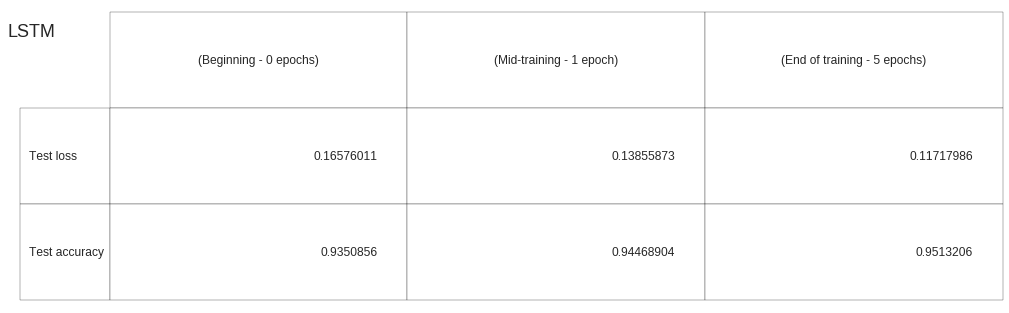

In [0]:
plot_summary_table(experiment_results)


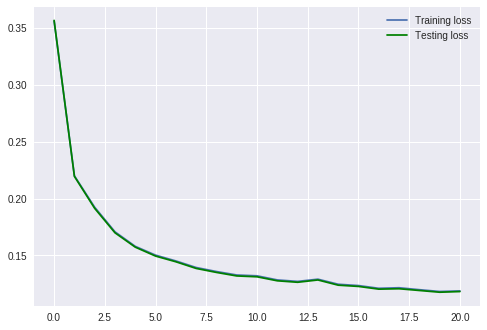

In [0]:
plot_learning_curves(train_loss, test_loss)

In [0]:
#plt.plot(train_loss)

# Pixel prediction

### Generate a small in-painting dataset.
Sample $100$ images from your test set. Mask/Remove the last $300$ pixels (roughly 10 rows and a half).

In [0]:
#Sample 100 images + mask 
#eval_mnist = get_data()  
test_data = eval_mnist.test.images
length = test_data.shape[0]
index = np.random.randint(0,length,size=100)
samples = test_data[index,:]
samples = binarize(samples)
samples_y_ = samples[:,-783:]
samples_mask = np.copy(samples)
samples_mask[:,-300:] = samples_mask[:,-300:]*0.


### Predict missing parts and compare with the ground truth. 
Given the above generated partial sequences as input to your train models, generate the continuation of these masked images (for the next 1, 10, 28, 300 pixels).

In [0]:
#Use the model for predictions and compare log likelihood
#@title 
#@test {"output": "ignore"}

experiment_results = {}
num_epochs=5
learning_rate=0.001
batch_size=256
#fully_connected_hidden_units=64

experiment_results['LSTM'] = []
test_loss = []
train_loss = []

def generatesample(p):
  value = [0,1]
  samples = []
  for i in range(len(p)):
    samples.append(np.random.choice(value,p=[(1-p[i]),p[i]]))
  return samples

# Advisable to you GPU for this part
with tf.device('/device:GPU:*'):

  tf.reset_default_graph()
  
  
  # your model here....  
  x, y_ = get_placeholders()
  #mnist = get_data()
  #eval_mnist = get_data()
  
  y = LSTMRnn(x)
  
  loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y_,logits=y))
  #loss = -tf.reduce_mean(y_*tf.log(y))
  opt = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)
  y_sig = tf.sigmoid(y)
  correct = tf.equal(tf.to_float(y_sig>0.5),y_)
  accuracy = tf.reduce_mean(tf.cast(correct,tf.float32))


  #train_size = len(mnist.train.images)
  #test_xs = binarize(eval_mnist.test.images)
  #te_x = test_xs[:,:783]
  #te_y = test_xs[:,-783:]
  #train_xs = binarize(mnist.train.images)
  #tr_x = train_xs[:,:783]
  #tr_y = train_xs[:,-783:]
  #index = np.random.randint(0,train_size,size=10000)

  '''
  with tf.Session() as sess4:    
      #with tf.train.MonitoredSession() as sess: 
      saver = tf.train.Saver()
      ckpt_path = './model/task-e4.ckpt'
      saver.restore(sess4, ckpt_path)
      y_samtest1 = sess4.run(y,feed_dict={x:sam_test})
  '''
    
  with tf.Session() as sess0:    
      #with tf.train.MonitoredSession() as sess: 
      saver = tf.train.Saver()
      ckpt_path = './model/task-e0.ckpt'
      saver.restore(sess0, ckpt_path)
      samples_x0 = np.copy(samples_mask[:,:783])
      for i in range(300):
        samples_y0 = sess0.run(y_sig,feed_dict={x:samples_x0})
        update_index = -300+i
        p = samples_y0[:,update_index]
        updatepixel = generatesample(p)
        samples_x0[:,update_index+1] = updatepixel
      #samples_y0 = sess0.run(y,feed_dict={x:samples_x0})
      loss0 = sess0.run(loss,feed_dict={y_:samples_y_,y:samples_y0})
      
  with tf.Session() as sess1:    
      #with tf.train.MonitoredSession() as sess:  
      saver = tf.train.Saver()
      ckpt_path = './model/task-e1.ckpt'
      saver.restore(sess1, ckpt_path)
      samples_x1 = np.copy(samples_mask[:,:783])
      for i in range(300):
        samples_y1 = sess1.run(y_sig,feed_dict={x:samples_x1})
        update_index = -300+i
        p = samples_y1[:,update_index]
        updatepixel = generatesample(p)
        samples_x1[:,update_index+1] = updatepixel
      #samples_y1 = sess1.run(y,feed_dict={x:samples_x1})
      loss1 = sess1.run(loss,feed_dict={y_:samples_y_,y:samples_y1})
    
  with tf.Session() as sess4:    
      #with tf.train.MonitoredSession() as sess:  
      saver = tf.train.Saver()
      ckpt_path = './model/task-e4.ckpt'
      saver.restore(sess4, ckpt_path)
      samples_x4 = np.copy(samples_mask[:,:783])
      for i in range(300):
        samples_y4 = sess4.run(y_sig,feed_dict={x:samples_x4})
        update_index = -300+i
        p = samples_y4[:,update_index]
        updatepixel = generatesample(p)
        samples_x4[:,update_index+1] = updatepixel
      #samples_y4 = sess4.run(y,feed_dict={x:samples_x4})
      loss4 = sess4.run(loss,feed_dict={y_:samples_y_,y:samples_y4})
   
  

INFO:tensorflow:Restoring parameters from ./model/task-e0.ckpt
INFO:tensorflow:Restoring parameters from ./model/task-e1.ckpt
INFO:tensorflow:Restoring parameters from ./model/task-e4.ckpt


In [0]:
#ten samples

#calc cross entropy

def sampleset(p):
  l1,l2 = p.shape #100,300
  samples = np.zeros((10,l1,l2))
  for i in range(10):
    for j in range(l1):
      pp = p[j,:]
      s = generatesample(pp)
      samples[i,j,:] = s
  return samples


y = tf.placeholder(tf.float32, [None, None])
y_ = tf.placeholder(tf.float32, [None, None])


#epoch0
#p: samples_y0 [100,783]
#300 pixels [10,100,300]
p_e0_300 = np.copy(samples_y0[:,-300:])
#p_e0_300_sig = tf.sigmoid(p_e0_300)
#10,100,300

p_e1_300 = np.copy(samples_y1[:,-300:])
#p_e1_300_sig = tf.sigmoid(p_e1_300)
                  

p_e4_300 = np.copy(samples_y4[:,-300:])
#p_e4_300_sig = tf.sigmoid(p_e4_300)



loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y_,logits=y))
loss0 = np.zeros((10,4))
loss1 = np.zeros((10,4))
loss4 = np.zeros((10,4))
with tf.Session() as sess: 
  
   
  #p_e0_300_sig = sess.run(p_e0_300_sig)
  #p_e1_300_sig = sess.run(p_e1_300_sig)
  #p_e4_300_sig = sess.run(p_e4_300_sig)
  samples_e0_300 = sampleset(p_e0_300) #get 10,100,300 samples
  samples_e1_300 = sampleset(p_e1_300)
  samples_e4_300 = sampleset(p_e4_300) 
  
  for j in range(10):
    for i in range(4):
      ind = [1,10,28,300][i]
      img0 = np.copy(samples_mask)
      img_ = np.copy(samples)
      
      img0[:,484:ind+484] = samples_e0_300[j,:,:ind]
      loss0[j,i] = sess.run(loss,feed_dict={y_:img_[:,484:ind+484],y:img0[:,484:ind+484]})
      #loss0[j,i] = sess.run(loss,feed_dict={y_:img_,y:img0})
      img1 = np.copy(samples_mask)
      img1[:,484:ind+484] = samples_e1_300[j,:,:ind]
      loss1[j,i] = sess.run(loss,feed_dict={y_:img_[:,484:ind+484],y:img1[:,484:ind+484]})
      #loss1[j,i] = sess.run(loss,feed_dict={y_:img_,y:img1}) #samples_mask--img_
      img4 = np.copy(samples_mask)
      img4[:,484:ind+484] = samples_e4_300[j,:,:ind]
      loss4[j,i] = sess.run(loss,feed_dict={y_:img_[:,484:ind+484],y:img4[:,484:ind+484]})
      #loss4[j,i] = sess.run(loss,feed_dict={y_:img_,y:img4})
      
            



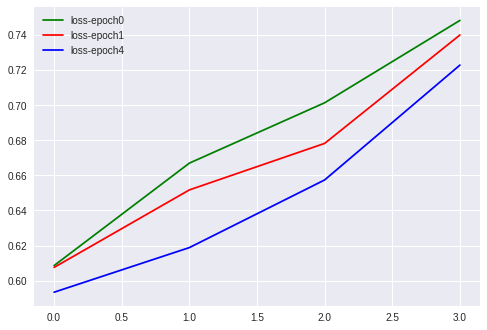

In [0]:
loss0_ = np.mean(loss0,axis=0)
loss1_ = np.mean(loss1,axis=0)
loss4_ = np.mean(loss4,axis=0)
plt.plot(loss0_,'g')
plt.plot(loss1_,'r')
plt.plot(loss4_,'b')
plt.legend(['loss-epoch0', 'loss-epoch1','loss-epoch4'])
plt.show()
#1,10,28,300

In [0]:
loss4_

array([0.5934666 , 0.61887535, 0.6574011 , 0.72280255])

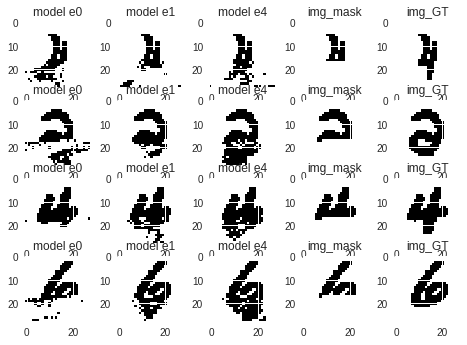

In [0]:
#model e0,e1,e4
num = 4
img_mask = np.copy(samples_mask)
img_GT = np.copy(samples)
index = np.random.randint(0,100,size=4)
index2 = np.random.randint(0,10,size=1)
imgs_e0 = samples_e0_300[index2,index,:] #10,100,300 -- 1,4,300
imgs_e1 = samples_e1_300[index2,index,:]
imgs_e4 = samples_e4_300[index2,index,:]
img_mask_show = img_mask[index,:]
img_GT_show = img_GT[index,:]
for i in range(num):
  plt.subplot(num,5,i*5+1)
  img = np.reshape(np.concatenate((img_mask_show[i,:-300], imgs_e0[i,:]), axis=0),(28,28))
  plt.imshow(img)
  plt.title('model e0')
  plt.subplot(num,5,i*5+2)
  img2 = np.reshape(np.concatenate((img_mask_show[i,:-300], imgs_e1[i,:]), axis=0),(28,28))
  plt.imshow(img2)
  plt.title('model e1')
  plt.subplot(num,5,i*5+3)
  img3 = np.reshape(np.concatenate((img_mask_show[i,:-300], imgs_e4[i,:]), axis=0),(28,28))
  plt.imshow(img3)
  plt.title('model e4')
  plt.subplot(num,5,i*5+4)
  img4 = np.reshape(img_mask_show[i,:],(28,28))
  plt.imshow(img4)
  plt.title('img_mask')
  plt.subplot(num,5,i*5+5)
  img5 = np.reshape(img_GT_show[i,:],(28,28))
  plt.imshow(img5)
  plt.title('img_GT')
plt.show()

    


In [0]:
index

array([15, 18, 35, 46])

### Visualize completing the image. 
Pick out $3$ examples from your in-painting dataset to visualize  the resulting images -- this can be done at random, but should include \textit{a successful example, failure example and one that displays high variance between samples.}

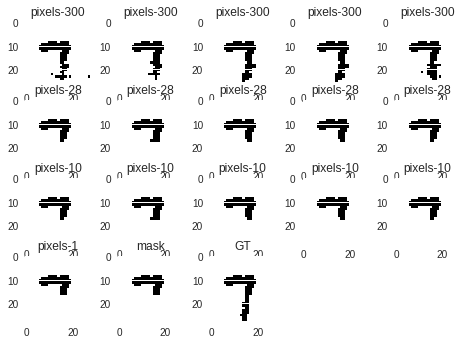

In [0]:
#Visualize samples

# successful example 63
imgs_mask = np.copy(samples_mask)
imgs_GT = np.copy(samples)
#index = np.random.randint(0,100,size=1)
index = 57#97
index2 = np.random.randint(0,10,size=5)
img_mask_sp = imgs_mask[index,:]
imgs_GT_sp = imgs_GT[index,:]
img_5sp = samples_e4_300[index2,index,:] #5,1,300
for j in range(3):
  for i in range(5):
    pixels = [300,28,10][j]
    img = np.copy(img_mask_sp)
    img[484:484+pixels] = img_5sp[i,:pixels]
    img = np.reshape(img,(28,28)) 
    plt.subplot(4,5,j*5+i+1)
    plt.imshow(img)
    plt.title('pixels-'+str(pixels))
    
img = np.copy(img_mask_sp)
img[484:485] = img_5sp[0,0]
img = np.reshape(img,(28,28)) 
plt.subplot(4,5,16)
plt.imshow(img)
plt.title('pixels-1')

img = np.copy(img_mask_sp)
img = np.reshape(img,(28,28)) 
plt.subplot(4,5,17)
plt.imshow(img)
plt.title('mask')

img = np.copy(imgs_GT_sp)
img = np.reshape(img,(28,28)) 
plt.subplot(4,5,18)
plt.imshow(img)
plt.title('GT')
plt.show()



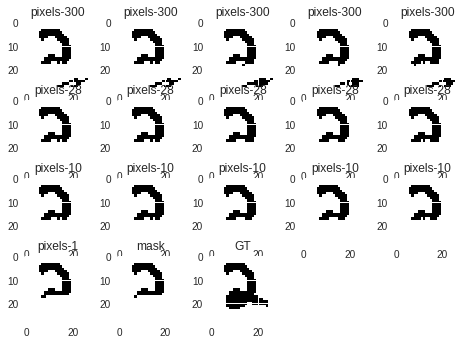

In [0]:
#failure example
imgs_mask = np.copy(samples_mask)
imgs_GT = np.copy(samples)
#index = np.random.randint(0,100,size=1)
index = 60
index2 = np.random.randint(0,10,size=5)
img_mask_sp = imgs_mask[index,:]
imgs_GT_sp = imgs_GT[index,:]
img_5sp = samples_e4_300[index2,index,:] #5,1,300
for j in range(3):
  for i in range(5):
    pixels = [300,28,10][j]
    img = np.copy(img_mask_sp)
    img[484:484+pixels] = img_5sp[i,:pixels]
    img = np.reshape(img,(28,28)) 
    plt.subplot(4,5,j*5+i+1)
    plt.imshow(img)
    plt.title('pixels-'+str(pixels))
    
img = np.copy(img_mask_sp)
img[484:485] = img_5sp[0,0]
img = np.reshape(img,(28,28)) 
plt.subplot(4,5,16)
plt.imshow(img)
plt.title('pixels-1')

img = np.copy(img_mask_sp)
img = np.reshape(img,(28,28)) 
plt.subplot(4,5,17)
plt.imshow(img)
plt.title('mask')

img = np.copy(imgs_GT_sp)
img = np.reshape(img,(28,28)) 
plt.subplot(4,5,18)
plt.imshow(img)
plt.title('GT')
plt.show()


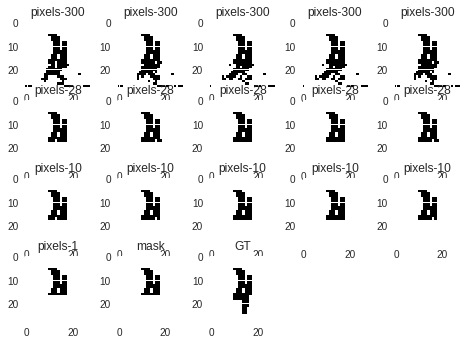

In [0]:
#one that displays high variance between samples
imgs_mask = np.copy(samples_mask)
imgs_GT = np.copy(samples)
#index = np.random.randint(0,100,size=1)
index = 15
index2 = np.random.randint(0,10,size=5)
img_mask_sp = imgs_mask[index,:]
imgs_GT_sp = imgs_GT[index,:]
img_5sp = samples_e4_300[index2,index,:] #5,1,300
for j in range(3):
  for i in range(5):
    pixels = [300,28,10][j]
    img = np.copy(img_mask_sp)
    img[484:484+pixels] = img_5sp[i,:pixels]
    img = np.reshape(img,(28,28)) 
    plt.subplot(4,5,j*5+i+1)
    plt.imshow(img)
    plt.title('pixels-'+str(pixels))
    
img = np.copy(img_mask_sp)
img[484:485] = img_5sp[0,0]
img = np.reshape(img,(28,28)) 
plt.subplot(4,5,16)
plt.imshow(img)
plt.title('pixels-1')

img = np.copy(img_mask_sp)
img = np.reshape(img,(28,28)) 
plt.subplot(4,5,17)
plt.imshow(img)
plt.title('mask')

img = np.copy(imgs_GT_sp)
img = np.reshape(img,(28,28)) 
plt.subplot(4,5,18)
plt.imshow(img)
plt.title('GT')
plt.show()


# In-painting Task

### In-painting data 

We provide two datasets (one corresponing to the one-pixel in-painting tasks and the other one with a 2x2 patch missing). The datasets are available on [git](https://github.com/dianaborsa/compgi22_dl_cw4/blob/master/). Links are available in the description and code is provide below to load the dataset and visualize. Both datasets have 1000 sampled images from MNIST(test). Both dataset sets have the same simple structure: cropped images and their ground truth (GT). in this second task, you will consider the copped images and use your pixel-to-pixel model, try to predict the missing pixel/patches.


In [0]:
# Downloading the inpainting datasets
!git clone https://github.com/dianaborsa/compgi22_dl_cw4.git

Cloning into 'compgi22_dl_cw4'...
remote: Counting objects: 16, done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 16 (delta 6), reused 3 (delta 0), pack-reused 0
Unpacking objects: 100% (16/16), done.


In [0]:
# Load the dataset (2X2)
dataset = np.load('compgi22_dl_cw4/2X2_pixels_inpainting.npy')

Loaded dataset has 1000 samples: cropped + GT


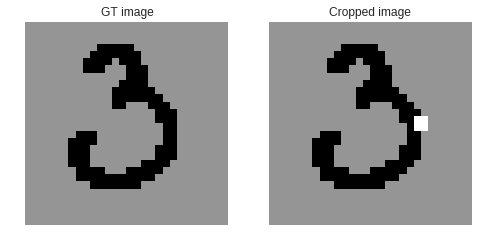

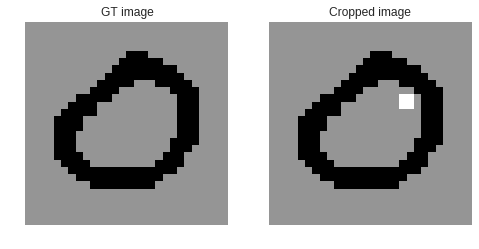

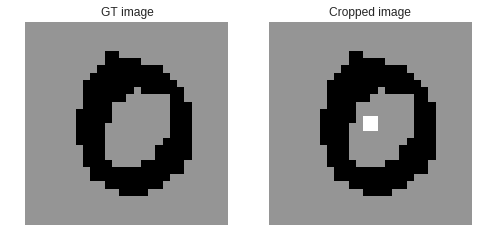

In [0]:
# checking loading
images    = dataset[0]
gt_images = dataset[1] 

nSamples, ndim = gt_images.shape
print('Loaded dataset has {} samples: cropped + GT'.format(nSamples))

# randomly visualize a few samples
for SampleID in np.random.randint(nSamples,size=3):
  plt.figure()
  plt.subplot(1,2,1)
  plt.imshow(np.reshape(gt_images[SampleID],(28,28)), interpolation='None',vmin=-1, vmax=1)
  plt.title("GT image")
  plt.grid(False)
  plt.axis('off')
  plt.subplot(1,2,2)
  plt.imshow(np.reshape(images[SampleID],(28,28)), interpolation='None',vmin=-1, vmax=1)
  plt.title("Cropped image")
  plt.grid(False)
  plt.axis('off')

In [0]:
# Load the dataset (1 pixel)
dataset1 = np.load('compgi22_dl_cw4/one_pixel_inpainting.npy')

Loaded dataset has 1000 samples: cropped + GT


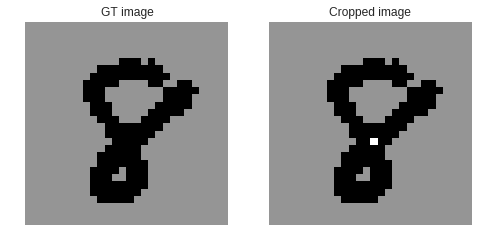

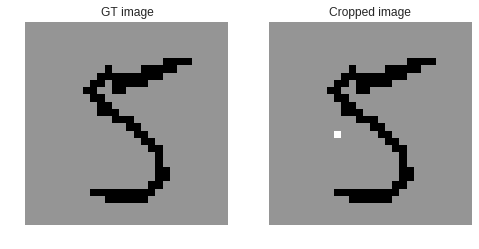

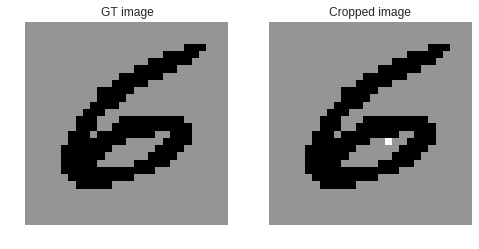

In [0]:
# checking loading
images1    = dataset1[0]
gt_images1 = dataset1[1] 

nSamples, ndim = gt_images1.shape
print('Loaded dataset has {} samples: cropped + GT'.format(nSamples))

# randomly visualize a few samples
for SampleID in np.random.randint(nSamples,size=3):
  plt.figure()
  plt.subplot(1,2,1)
  plt.imshow(np.reshape(gt_images1[SampleID],(28,28)), interpolation='None',vmin=-1, vmax=1)
  plt.title("GT image")
  plt.grid(False)
  plt.axis('off')
  plt.subplot(1,2,2)
  plt.imshow(np.reshape(images1[SampleID],(28,28)), interpolation='None',vmin=-1, vmax=1)
  plt.title("Cropped image")
  plt.grid(False)
  plt.axis('off')

### One-pixel prediction 

In [0]:
# Predicting the missing pixel
#images1 1000,784

experiment_results = {}
num_epochs=5
learning_rate=0.001
batch_size=256
#fully_connected_hidden_units=64

experiment_results['LSTM'] = []
test_loss = []
train_loss = []

def generatesample(p):
  value = [0,1]
  samples = []
  for i in range(len(p)):
    samples.append(np.random.choice(value,p=[(1-p[i]),p[i]]))
  return samples

# Advisable to you GPU for this part
with tf.device('/device:GPU:*'):

  tf.reset_default_graph()
  
  
  # your model here....  
  x, y_ = get_placeholders()
  
  y = LSTMRnn(x)
  
  loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y_,logits=y))
  #loss = -tf.reduce_mean(y_*tf.log(y))
  opt = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)
  y_sig = tf.sigmoid(y)
  correct = tf.equal(tf.to_float(y_sig>0.5),y_)
  accuracy = tf.reduce_mean(tf.cast(correct,tf.float32))


 
 

def predmissing(data): #one missing pixel
  missing_index = np.where(data==-1)
  img0 = np.copy(data)
  #when missing pixel is 0:
  img0[missing_index] = 0
  img0_x = img0[:,:783]
  img1 = np.copy(data)
  #when missing pixel is 1
  img1[missing_index] = 1
  img1_x = img1[:,:783]
  with tf.Session() as sess:    
      #with tf.train.MonitoredSession() as sess:  
      saver = tf.train.Saver()
      ckpt_path = './model/task-e4.ckpt'
      saver.restore(sess, ckpt_path)
      y0 = sess.run(y_sig,feed_dict={x:img0_x}) 
      y1 = sess.run(y_sig,feed_dict={x:img1_x})
  #calc probability
  prob0 = []
  prob1 = []
  for i in range(len(missing_index[0])):
    a0 = missing_index[0][i] #index of img from 1-1000
    a1 = missing_index[1][i] #missing pixel in each img
    y0[a0,a1-1:] #the prob of pixel when pixel=1
    y_0 = img0[a0,a1:]*y0[a0,a1-1:]+(img0[a0,a1:]<1)*(1-y0[a0,a1-1:])
    y_1 = img1[a0,a1:]*y1[a0,a1-1:]+(img1[a0,a1:]<1)*(1-y1[a0,a1-1:])#
    prob0.append(np.prod(y_0))
    prob1.append(np.prod(y_1))
  prob = np.vstack((prob0,prob1))
  div = np.array(prob0)+np.array(prob1)
  prob = np.divide(np.array(prob, dtype=float), np.array(div, dtype=float))
  prediction = np.argmax(prob,axis=0)
  
  return prediction,prob

prediction1,prob1 = predmissing(images1)


INFO:tensorflow:Restoring parameters from ./model/task-e4.ckpt


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in divide


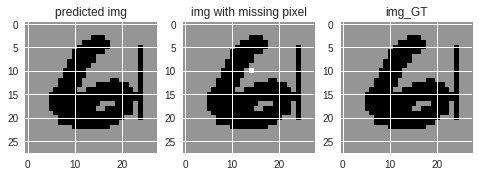

In [0]:
# Visualize samples
#the most probable
most_index = np.argmax(prob1) #2: 0--prob for0,1: for1
#most_a0 = most_index/1000 #1
most_a1 = most_index%1000 #895
pred = prediction1[most_a1]
imgs_GT = np.copy(gt_images1[most_a1,:]) #GT
imgs = np.copy(images1[most_a1,:]) # with pred
imgs_m = np.copy(images1[most_a1,:]) #with missing
miss = np.where(imgs==-1)
imgs[miss] = pred
plt.subplot(1,3,1)
plt.imshow(np.reshape(imgs,(28,28)), interpolation='None',vmin=-1, vmax=1)
plt.title('predicted img')
plt.subplot(1,3,2)
plt.imshow(np.reshape(imgs_m,(28,28)), interpolation='None',vmin=-1, vmax=1)
plt.title('img with missing pixel')
plt.subplot(1,3,3)
plt.imshow(np.reshape(imgs_GT,(28,28)), interpolation='None',vmin=-1, vmax=1)
plt.title('img_GT')
plt.show()

In [0]:
#Calc cross-entropy
missing_index = np.where(images1==-1)
img_pred = np.copy(images1)
img_m = np.copy(images1)
img_pred[missing_index] = prediction1
imgs_GT = np.copy(gt_images1) #100,784

experiment_results = {}
num_epochs=5
learning_rate=0.001
batch_size=256
#fully_connected_hidden_units=64


# Advisable to you GPU for this part
with tf.device('/device:GPU:*'):

  tf.reset_default_graph()
  
  
  # your model here....  
  x, y_ = get_placeholders()
  y = LSTMRnn(x)
  
  loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y_,logits=y))
  #loss2 = -tf.reduce_mean(y_*tf.log(y)+(1-y_)*tf.log(1-y))
  opt = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)
  y_sig = tf.sigmoid(y)
  correct = tf.equal(tf.to_float(y_sig>0.5),y_)
  accuracy = tf.reduce_mean(tf.cast(correct,tf.float32))

 
  with tf.Session() as sess:    
    #with tf.train.MonitoredSession() as sess:  
    saver = tf.train.Saver()
    ckpt_path = './model/task-e4.ckpt'
    saver.restore(sess, ckpt_path)
    loss_GTp = sess.run(loss,feed_dict={y_:np.reshape(imgs_GT[most_a1,:783],(1,783)),y:np.reshape(img_pred[most_a1,:783],(1,783))})
    loss_GTm = sess.run(loss,feed_dict={y_:np.reshape(imgs_GT[most_a1,:783],(1,783)),y:np.reshape(img_m[most_a1,:783],(1,783))})
   

INFO:tensorflow:Restoring parameters from ./model/task-e4.ckpt


In [0]:
print(loss_GTp)
print(loss_GTm)

0.5864105
0.58592534


### Two-by-two patch prediction 

In [0]:
# Predicting the missing patch

  #images1 1000,784

experiment_results = {}
num_epochs=5
learning_rate=0.001
batch_size=256
#fully_connected_hidden_units=64

experiment_results['LSTM'] = []
test_loss = []
train_loss = []

# Advisable to you GPU for this part
with tf.device('/device:GPU:*'):

  tf.reset_default_graph()
  
  
  # your model here....  
  x, y_ = get_placeholders()
  
  y = LSTMRnn(x)
  
  loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y_,logits=y))
  #loss = -tf.reduce_mean(y_*tf.log(y))
  opt = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)
  y_sig = tf.sigmoid(y)
  correct = tf.equal(tf.to_float(y_sig>0.5),y_)
  accuracy = tf.reduce_mean(tf.cast(correct,tf.float32))
 
  #images and gt_images
  miss_index = np.where(images==-1)
  miss_index0 = [miss_index[1][i*4] for i in range(1000)]
  miss_index1 = [miss_index[1][i*4+1] for i in range(1000)]
  miss_index2 = [miss_index[1][i*4+2] for i in range(1000)]
  miss_index3 = [miss_index[1][i*4+3] for i in range(1000)]
  miss_index_ = np.arange(1000)
  img_filled = np.zeros((16,1000,784))
  
  #get the imgs of 16 combinations
  i = 0
  combinations = []
  for p0 in [0,1]:
    for p1 in [0,1]:
      for p2 in [0,1]:
        for p3 in [0,1]:         
          img = np.copy(images)
          img[miss_index_,miss_index0] = p0
          img[miss_index_,miss_index1] = p1
          img[miss_index_,miss_index2] = p2
          img[miss_index_,miss_index3] = p3
          img_filled[i,:,:] = img
          i += 1
          combinations.append((p0,p1,p2,p3))
  prob = np.zeros((16,1000))
  with tf.Session() as sess:
    saver = tf.train.Saver()
    ckpt_path = './model/task-e4.ckpt'
    saver.restore(sess, ckpt_path)
    for i in range(16):
      img_f = np.copy(img_filled[i,:,:]) #images after fill the missing pixels
      img_input = img_f[:,:783]    
      y = sess.run(y_sig,feed_dict={x:img_input})  #1000,783
      y_crt = img_f[:,1:]*y+(img_f[:,1:]<1)*(1-y) #[1000,783]
      prob[i,:] = np.prod(y_crt,axis=1) #[1000,]
     
  div = np.sum(prob,axis=0) #1000,
  prob_nor = np.divide(np.array(prob, dtype=float), np.array(div, dtype=float))
  prediction = np.argmax(prob_nor,axis=0) #[1000]              

INFO:tensorflow:Restoring parameters from ./model/task-e4.ckpt


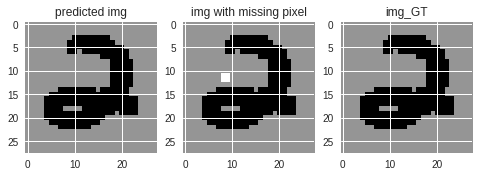

In [0]:
# Visualize samples
#the most probable
most_index = np.argmax(prob_nor) #prob_nor[16,1000]
#most_a0 = most_index/1000 #1
most_a1 = most_index%1000 #return num of image
pred = prediction[most_a1]
values = combinations[pred]
imgs_GT = np.copy(gt_images[most_a1,:]) #GT
imgs = np.copy(images[most_a1,:]) # with pred
imgs_m = np.copy(images[most_a1,:]) #with missing
miss = np.where(imgs==-1)
imgs[miss] = pred
plt.subplot(1,3,1)
plt.imshow(np.reshape(imgs,(28,28)), interpolation='None',vmin=-1, vmax=1)
plt.title('predicted img')
plt.subplot(1,3,2)
plt.imshow(np.reshape(imgs_m,(28,28)), interpolation='None',vmin=-1, vmax=1)
plt.title('img with missing pixel')
plt.subplot(1,3,3)
plt.imshow(np.reshape(imgs_GT,(28,28)), interpolation='None',vmin=-1, vmax=1)
plt.title('img_GT')
plt.show()

In [0]:
#Calc cross-entropy


experiment_results = {}
num_epochs=5
learning_rate=0.001
batch_size=256
#fully_connected_hidden_units=64

experiment_results['LSTM'] = []
test_loss = []
train_loss = []

# Advisable to you GPU for this part
with tf.device('/device:GPU:*'):

  tf.reset_default_graph()
  
  
  # your model here....  
  x, y_ = get_placeholders()

  
  y = LSTMRnn(x)
  
  loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y_,logits=y))
  #loss = -tf.reduce_mean(y_*tf.log(y))
  opt = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)
  y_sig = tf.sigmoid(y)
  correct = tf.equal(tf.to_float(y_sig>0.5),y_)
  accuracy = tf.reduce_mean(tf.cast(correct,tf.float32))

  imgs_GT = np.copy(gt_images)
  img_pred = np.copy(images) #[1000,784]
  img_m = np.copy(images)
  for i in range(1000):
    pred = prediction[i]
    v = combinations[pred]    
    img = np.copy(img_pred[i,:])
    miss = np.where(img==-1)
    img[miss] = v
    img_pred[i,:] = img
  
 
  with tf.Session() as sess:    
    #with tf.train.MonitoredSession() as sess:  
    saver = tf.train.Saver()
    ckpt_path = './model/task-e4.ckpt'
    saver.restore(sess, ckpt_path)
    loss_GTp = sess.run(loss,feed_dict={y_:np.reshape(imgs_GT[most_a1,:783],(1,783)),y:np.reshape(img_pred[most_a1,:783],(1,783))})
    loss_GTm = sess.run(loss,feed_dict={y_:np.reshape(imgs_GT[most_a1,:783],(1,783)),y:np.reshape(img_m[most_a1,:783],(1,783))})



INFO:tensorflow:Restoring parameters from ./model/task-e4.ckpt


In [0]:
print(loss_GTp)
print(loss_GTm)

0.5888364
0.5868957


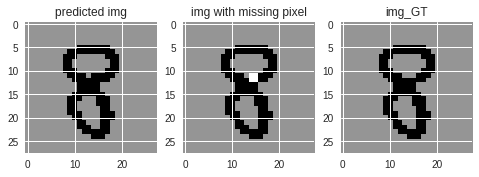

In [0]:
# Visualize samples
#test 

most_a1 = np.random.choice(1000,1)[0] #prob_nor[16,1000]
#most_a0 = most_index/1000 #1
#most_a1 = most_index%1000 #return num of image
pred = prediction[most_a1]
values = combinations[pred]
imgs_GT = np.copy(gt_images[most_a1,:]) #GT
imgs = np.copy(images[most_a1,:]) # with pred
imgs_m = np.copy(images[most_a1,:]) #with missing
miss = np.where(imgs==-1)
imgs[miss] = pred
plt.subplot(1,3,1)
plt.imshow(np.reshape(imgs,(28,28)), interpolation='None',vmin=-1, vmax=1)
plt.title('predicted img')
plt.subplot(1,3,2)
plt.imshow(np.reshape(imgs_m,(28,28)), interpolation='None',vmin=-1, vmax=1)
plt.title('img with missing pixel')
plt.subplot(1,3,3)
plt.imshow(np.reshape(imgs_GT,(28,28)), interpolation='None',vmin=-1, vmax=1)
plt.title('img_GT')
plt.show()


----------------------------------------------------------------------

## PART 2: Learning multiple tasks with LSTM-s (40 pts)
(Credits to Pedro Ortega for insipring the task and insights behind it)

### Task Description

Consider the following generative model: 
* We have $3$ symbols that will be generates from a multinomial/categorical distribution, with parameters $\textbf{p}=(p_1, p_2, p_3)$: symbol 1 is generated with probability $p_1$, symbol 2 is generated with probability $p_2$, symbol 3 with probability $p_3$. 
$$X \sim Categorical(3, \textbf{p})$$

* The parameter vector $\textbf{p}$ is drawn from a Dirichlet prior: $$\textbf{p} \sim Dirichlet(\alpha)$$

We are going to use the above to generate sequences (a continuous stream of data/observations), in the following way:
* Step 1: We sample $\textbf{p}$ from the prior
* Step 2: Given this $\textbf{p}$, for $T-1$ time-steps we will generate i.i.d observations by sampling one of the $3$ symbols from the categorical distribution induced by $\textbf{p}$
$$ (X_1, X_2, \cdots X_{T-1}) , s.t. X_i \sim Categorical(3, \textbf{p})$$
* Step 3: At the end of the sequence we append a fourth symbol (RESET): $(X_1, X_2, \cdots X_T, RESET)$
* Step 4: Return to Step 1 and resample $\textbf{p}$. 
* Repeat this 'forever'.

This will give rise to a continuous stream of data, of the form: $ x_1, x_2, \cdots x_{T-1}, RESET, x_{T+1}, x_{T+2}, \cdots x_{2T}, RESET, \cdots, x_{kT+1}, x_{kT+2}, \cdots x_{(k+1)T}, RESET, \cdots$.

Note: Data generation is provided for you in the cell below. (You just need to call the minibatch function to get a sequence of this form).

### Model

We are going to consider an simple LSTM (32 units hidden state) and present this (generated) sequence of data as an input. Similar to the pixel-to-pixel model, at each time step the LSTM will receive one bit of information (gets to observe the symbol recorded at this time step) and need to output the probability distribution for the next symbol. Thus, at time $t$ the LSTM get as input the symbol $x_t$ and will return a probability over the next state $P(x_{t+1}| x_{t}, LSTM_{t-1})$.

### Questions

1) **Without running any experiments (5 pts)**, try to think about the following scenarios and answer these questions: 
* Consider we generate the data with $Dirichlet(\alpha)$, where $\alpha = (10.,1.,1.)$. What do you think the LSTM model will learn, if anything? Remember we are effectively changing the prediction task, every time we are resampling the probability vector $\textbf{p}$. * Hint: Think about the distribution over $\textbf{p}$ that this prior induces. *  

LSTM will tend to preduce more symbol1 because according to the prior, symbol1 tend to be with higher probability.

* What if we consider a more uniformative prior, like $\alpha=(1.1, 1.1, 1.1)$?  

* How does this (learning ability and generalization) depend on the lenght of the tasks $T$ and the unrolling length on the LSTM? It might be helpful to consider the two extremes: 
i) $T=1$ (we reset the task at every time step). What should the model learn in this case?, ii) $T=\infty$ (we sample the task once and keep it forever). What should the model learn in this case? (Answer this for both previous priors)


* Does this increase or descrease the complexity of the prediction problem? What about the ability to generalize to unseen $\textbf{p}$?

2) **Time to check your intuitions (10 pts)** 

Implement a similar LSTM model as in PART 1. This will take as input a one-hot description of the obsevation ($[1,0,0,0]$ for symbol 1. $[0,1,0,0]$ for symbol 2, $[0,0,1,0]$ for symbol 3, $[0,0,0,1]$ for the RESET symbol). This input is fed into a 32-unit LSTM and LSTM output is processed as before: $\textrm{Relu} \Rightarrow \textrm{Fully connected} \Rightarrow \textrm{Relu} \Rightarrow \textrm{Fully connected} \Rightarrow \textrm{Output}$ . The model will be trained, as before, by cross-entropy on predicting the next symbol. You will notice that the setup is really similar to the previous tasks, so feel free to re-use whenever appropiate.

Train the following models:
* T = 5, and T=20 with the data generated from a Dirichlet with $\alpha = (10.,1.,1.)$. Unrolling length for the LSTM = 100. Minibatch size = 64. (M1, M2)
* T = 5, and T=20 with the data generated from a Dirichlet with$\alpha = (1.3, 1.3, 1.3)$ Unrolling length for the LSTM = 100. Minibatch size = 64. (M3, M4)

Train the models for $1000$ iterations ($1000$ minibatches). Record the training and testing preformance (every 10-20 iterations). Plot the curves over training time. What do you observe? (Is this curve smooth? Do any of them plateau?). **[2x5 pts]**


3) **Analysis results (10 pts)**

In this section, we will investigate what the models have actaully learnt. For this we will generate a few test sequences:
* *Test sequence 1*: generate a test sequence that changes tasks every T=5 steps from a a Dirichlet with $\alpha = (10.,1.,1.)$.
* *Test sequence 2*: generate a test sequence that changes tasks every T=5 steps from a a Dirichlet with $\alpha = (1.3,1.3,1.3)$.
* *Test sequence 3*: generate a test sequence that 'changes tasks' every T=5 steps, but keep sampling according to the same probability vector $\textbf{p}=(1,0,0)$ (You can use any of the extreme here).

i) Test the preformance of M1 and M3 and these test sequences. In addition plot the actual prediction the models do (probability of symbols over time). This should give you more insight in what the model does. Does this correspond or contradict your previous intuitions? **[5 pts]**

ii) Repeat the same procedure for task length $T=20$ and models M2 and M4. What do you observe? How do M2 and M4 compare to each other and how to their compare to M1 and M3 (the models trained on the shorter task length). **[5 pts]**

4) **Comparison to the Bayesian update (15 pts)**

Going back to the generative process in the task description. For a given prior, for each the mini-tasks (selecting/sampling a $\textbf{p}$), one could compute the Bayesian posterior at each time step.  We start with a prior and every time we observe a symbol with update our posterior over the parameters
 $\textbf{p}$ given the data. We do this every time step, till we reach the RESET symbol which marks the end of the task. Then we start again, from the prior.

i) Derive the posterior update for each time step. (Hint: since the two distribution are conjugates or each other, the posterior has a closed form). **[3 pts]**

ii) Implement this posterior update and use it to infer the probabilities over the next symbol, for the previously generated test sequences. This will tell you, what the inferred probabilities would be, if we knew the structure of the model, the prior and that the reset symbol means the tasks has finished and we should reset our estimate to the prior. (For test sequence 1 and 2, use the prior that generated them, for test sequence 3 compute the updates starting from both priors) **[5 pts]**

iii) Compare this to what the LSTM predictions are. What do you observe? What are the failure cases -- can you explain why this might happen? (For test sequence 1 and 2, use the prior that generated them, for test sequence 3 compute the updates starting from both priors). **[7 pts]**
 
For this analysis, only consider $T=20$ and respectively models M2 and M4.

5) **Play (not for credit, just for fun)**

Visualize the hidden state of the LSTM. Look at the eigenvalues: How many of these are actual revelant? What do they correspond to?




In [0]:
#@title Generate data function

n_symbols = 3
def get_data_per_task(number_samples_per_task=10, p=None, alpha=None):
  if p == None:
    # sample task
    if alpha == None:
      p = np.random.dirichlet((1.3, 1.3, 1.3), 1)[0]
    else:
      p = np.random.dirichlet(alpha, 1)[0]
    
  p = np.append(p, [0])
  sample = np.random.multinomial(1, p, size = number_samples_per_task)
  
  sample = np.append(sample,[[0,0,0,1]], axis=0)
  return sample
  

def get_data(ntasks, nsamples_per_task, p=None, alpha=None):
  sample = []
  for task_id in range(ntasks):
    sample.append(get_data_per_task(number_samples_per_task = nsamples_per_task, p=p, alpha=alpha))
  return np.concatenate(sample)


def get_minibatch(batch_size, ntasks, nsamples_per_task, p=None, alpha=None):
  sample = get_data(batch_size*ntasks, nsamples_per_task, p=p, alpha=alpha)
  return np.reshape(sample, [batch_size, ntasks*(nsamples_per_task+1), n_symbols+1])
  

### Training your recurrent model

In [0]:
#@title Your models
#@title Your models
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import os
from google.colab import files

def LSTMRnn(x): #x:[-1,783]
  
  hidden_units = 64
  time_step = 100
  num_input = 4
  lstm_size = 32
  batch_size=64
  
  initializer = tf.contrib.layers.xavier_initializer()
  fc1_w = tf.Variable(initializer([lstm_size,hidden_units]))
  fc1_b = tf.Variable(initializer([hidden_units]))
  fc2_w = tf.Variable(initializer([hidden_units,num_input]))
  fc2_b = tf.Variable(initializer([num_input]))
  
  #x_ = tf.reshape(x,(-1,time_step,n_input))
  lstmcell = tf.contrib.rnn.BasicLSTMCell(lstm_size,forget_bias=1.0)
  #output:[batchsize,time_step,lstmsize]--[n,100,32]
  rnn_op,_ = tf.nn.dynamic_rnn(lstmcell,x,dtype=tf.float32,time_major=False)
  rnn_op = tf.reshape(rnn_op,(-1,lstm_size)) #-[n*100,32]
  relu_op = tf.nn.relu(rnn_op) #[batch*100,lstmsize]
  fc1_op = tf.nn.relu(tf.matmul(relu_op,fc1_w)+fc1_b)#[batch*100,hidden_units]
  fc2_op = tf.matmul(fc1_op,fc2_w)+fc2_b#[batch*100,4]
  y = tf.reshape(fc2_op,[-1,100,4])#[batch,100,4]
 
  return y
  
def model(ntasks, nsamples_per_task, alpha,modelname):
  experiment_results = {}
  num_epochs=1000
  learning_rate=0.001
  batch_size=64


  experiment_results['LSTM'] = []
  test_loss = []
  train_loss = []
  test_acc = []
  train_acc = []

  # Advisable to you GPU for this part
  with tf.device('/device:GPU:*'):
 
    tf.reset_default_graph()
    #your model here.... 
    x = tf.placeholder(tf.float32, [None, 100,4])
    y_ = tf.placeholder(tf.float32, [None, 99,4])
    y = LSTMRnn(x)
    ys = tf.reshape(y[:,:-1,:],(-1,4))
    ys_ = tf.reshape(y_,(-1,4))
  
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=ys_,logits=ys))
    opt = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)
    correct = tf.equal(tf.argmax(ys,1),tf.argmax(ys_,1)) #axis=2
    accuracy = tf.reduce_mean(tf.cast(correct,tf.float32))
    test_xs = np.zeros((batch_size*10,100,4))
    for i in range(10):
      test_xs[i*batch_size:(i+1)*batch_size,:,:] = get_minibatch(batch_size, ntasks, nsamples_per_task, alpha=alpha) 


    init = tf.global_variables_initializer()
    saver = tf.train.Saver()
    iter = 0
    with tf.Session() as sess:    
      #with tf.train.MonitoredSession() as sess:  
      sess.run(init)
      while iter < num_epochs:                
        batch_xs = get_minibatch(batch_size, ntasks, nsamples_per_task, alpha=alpha)     
        sess.run(opt,feed_dict={x:batch_xs,y_:batch_xs[:,1:,:]})
        iter += 1       
        if iter%20==0:
          print(modelname+'--epoch:'+str(iter))             
          test_loss.append(sess.run(loss,feed_dict={x:test_xs,y_:test_xs[:,1:,:]}))         
          train_loss.append(sess.run(loss,feed_dict={x:batch_xs,y_:batch_xs[:,1:,:]}))  
          train_acc.append(sess.run(accuracy,feed_dict={x:batch_xs,y_:batch_xs[:,1:,:]}))
          test_acc.append(sess.run(accuracy,feed_dict={x:test_xs,y_:test_xs[:,1:,:]}))
      ckpt_path = 'model/part2-'+modelname+'.ckpt'
      save_path = saver.save(sess, ckpt_path)
      print( os.getcwd() )
      print( os.listdir('model') )
      #files.download( "model/task1.ckpt.meta" ) 
      
  return  train_loss,test_loss,train_acc,test_acc



  

    

In [0]:
#@title Training
#@title Training
#@test {"output": "ignore"}
#get data
alpha = [(10.,1.,1.),(1.3,1.3,1.3)]
T = [5,20]
batch_size = 64
time_step = 100
ntasks = [100/t for t in T]
train_loss_m1,test_loss_m1,train_acc_m1,test_acc_m1 =  model(ntasks[0], 4, alpha[0],'m1')
train_loss_m2,test_loss_m2,train_acc_m2,test_acc_m2 =  model(ntasks[1], 19, alpha[0],'m2')
train_loss_m3,test_loss_m3,train_acc_m3,test_acc_m3 =  model(ntasks[0], 4, alpha[1],'m3')
train_loss_m4,test_loss_m4,train_acc_m4,test_acc_m4 =  model(ntasks[1], 19, alpha[1],'m4')


m1--epoch:20
m1--epoch:40
m1--epoch:60
m1--epoch:80
m1--epoch:100
m1--epoch:120
m1--epoch:140
m1--epoch:160
m1--epoch:180
m1--epoch:200
m1--epoch:220
m1--epoch:240
m1--epoch:260
m1--epoch:280
m1--epoch:300
m1--epoch:320
m1--epoch:340
m1--epoch:360
m1--epoch:380
m1--epoch:400
m1--epoch:420
m1--epoch:440
m1--epoch:460
m1--epoch:480
m1--epoch:500
m1--epoch:520
m1--epoch:540
m1--epoch:560
m1--epoch:580
m1--epoch:600
m1--epoch:620
m1--epoch:640
m1--epoch:660
m1--epoch:680
m1--epoch:700
m1--epoch:720
m1--epoch:740
m1--epoch:760
m1--epoch:780
m1--epoch:800
m1--epoch:820
m1--epoch:840
m1--epoch:860
m1--epoch:880
m1--epoch:900
m1--epoch:920
m1--epoch:940
m1--epoch:960
m1--epoch:980
m1--epoch:1000
/content
['part2-m3.ckpt.index', 'part2-m1.ckpt.data-00000-of-00001', 'part2-m1.ckpt.meta', 'part2-m4.ckpt.data-00000-of-00001', 'part2-m1.ckpt.index', 'part2-m4.ckpt.index', 'part2m1.ckpt.index', 'checkpoint', 'part2-m3.ckpt.meta', 'part2m1.ckpt.meta', 'part2-m2.ckpt.index', 'part2-m3.ckpt.data-00000-

m3--epoch:60
m3--epoch:80
m3--epoch:100
m3--epoch:120
m3--epoch:140
m3--epoch:160
m3--epoch:180
m3--epoch:200
m3--epoch:220
m3--epoch:240
m3--epoch:260
m3--epoch:280
m3--epoch:300
m3--epoch:320
m3--epoch:340
m3--epoch:360
m3--epoch:380
m3--epoch:400
m3--epoch:420
m3--epoch:440
m3--epoch:460
m3--epoch:480
m3--epoch:500
m3--epoch:520
m3--epoch:540
m3--epoch:560
m3--epoch:580
m3--epoch:600
m3--epoch:620
m3--epoch:640
m3--epoch:660
m3--epoch:680
m3--epoch:700
m3--epoch:720
m3--epoch:740
m3--epoch:760
m3--epoch:780
m3--epoch:800
m3--epoch:820
m3--epoch:840
m3--epoch:860
m3--epoch:880
m3--epoch:900
m3--epoch:920
m3--epoch:940
m3--epoch:960
m3--epoch:980
m3--epoch:1000
/content
['part2-m3.ckpt.index', 'part2-m1.ckpt.data-00000-of-00001', 'part2-m1.ckpt.meta', 'part2-m4.ckpt.data-00000-of-00001', 'part2-m1.ckpt.index', 'part2-m4.ckpt.index', 'part2m1.ckpt.index', 'checkpoint', 'part2-m3.ckpt.meta', 'part2m1.ckpt.meta', 'part2-m2.ckpt.index', 'part2-m3.ckpt.data-00000-of-00001', 'part2-m4.ckpt.

### Analysing your recurrent model

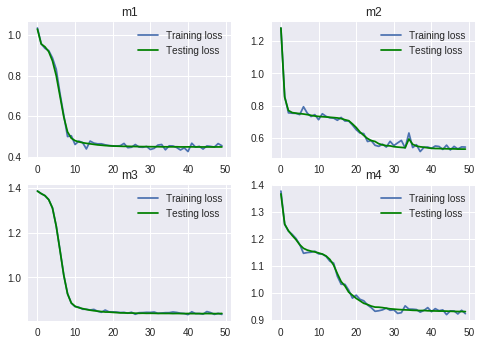

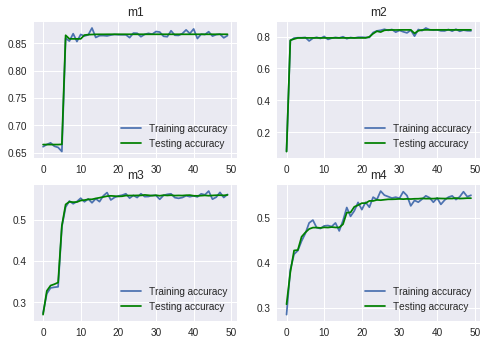

In [0]:
# Plot learning curves 
def plot_learning_curves(training_loss, testing_loss,modelname,i):
  #plt.figure()
  plt.subplot(2,2,i)
  plt.plot(training_loss)
  plt.plot(testing_loss, 'g')
  plt.title(modelname)
  plt.legend(['Training loss', 'Testing loss'])
  
def plot_learning_curves2(training_accuracy, testing_accuracy,modelname,i):
  #plt.figure()
  plt.subplot(2,2,i)
  plt.plot(training_accuracy)
  plt.plot(testing_accuracy, 'g')
  plt.title(modelname)
  plt.legend(['Training accuracy', 'Testing accuracy'])


plot_learning_curves(train_loss_m1,test_loss_m1,'m1',1)
plot_learning_curves(train_loss_m2,test_loss_m2,'m2',2)
plot_learning_curves(train_loss_m3,test_loss_m3,'m3',3)
plot_learning_curves(train_loss_m4,test_loss_m4,'m4',4)
plt.show()

plot_learning_curves2(train_acc_m1,test_acc_m1,'m1',1)
plot_learning_curves2(train_acc_m2,test_acc_m2,'m2',2)
plot_learning_curves2(train_acc_m3,test_acc_m3,'m3',3)
plot_learning_curves2(train_acc_m4,test_acc_m4,'m4',4)
plt.show()


In [0]:
alpha = [(10.,1.,1.),(1.3,1.3,1.3)]
T = [5,20]
batch_size = 1
time_step = 100
ntasks = [100/t for t in T]

test_seq1 = get_minibatch(batch_size,ntasks[0],4,alpha=alpha[0]) #[64,100,4]
test_seq2 = get_minibatch(batch_size,ntasks[0],4,alpha=alpha[1])
test_seq3 = get_minibatch(batch_size,ntasks[0],4,p=[1.0, 0.0, 0.0])

with tf.device('/device:GPU:*'):

  tf.reset_default_graph()
  
  x = tf.placeholder(tf.float32, [None, 100,4])
  y = LSTMRnn(x) # batch,100,4
  y_sm = tf.nn.softmax(tf.reshape(y,(-1,4)))
  y_rsm = tf.reshape(y_sm,(-1,100,4))
  #model m1
  with tf.Session() as sess1:     
    saver = tf.train.Saver()
    ckpt_path = './model/part2-m1.ckpt'
    saver.restore(sess1, ckpt_path)
    y_m1_seq1 = sess1.run(y_rsm,feed_dict={x:test_seq1})
    y_m1_seq2 = sess1.run(y_rsm,feed_dict={x:test_seq2})
    y_m1_seq3 = sess1.run(y_rsm,feed_dict={x:test_seq3})
  
  #model m3
  with tf.Session() as sess3:     
    saver = tf.train.Saver()
    ckpt_path = './model/part2-m3.ckpt'
    saver.restore(sess3, ckpt_path)
    y_m3_seq1 = sess3.run(y_rsm,feed_dict={x:test_seq1})
    y_m3_seq2 = sess3.run(y_rsm,feed_dict={x:test_seq2})
    y_m3_seq3 = sess3.run(y_rsm,feed_dict={x:test_seq3})


# Sample generation of test sequence:
# get_minibatch(batch_size, num_tasks_per_batch, num_samples_per_task-1, p=[1.0, 0.0, 0.0])

INFO:tensorflow:Restoring parameters from ./model/part2-m1.ckpt
INFO:tensorflow:Restoring parameters from ./model/part2-m3.ckpt


In [0]:
alpha = [(10.,1.,1.),(1.3,1.3,1.3)]
T = [5,20]
batch_size = 1
time_step = 100
ntasks = [100/t for t in T]

test2_seq1 = get_minibatch(batch_size,ntasks[1],19,alpha=alpha[0]) #[64,100,4]
test2_seq2 = get_minibatch(batch_size,ntasks[1],19,alpha=alpha[1])
test2_seq3 = get_minibatch(batch_size,ntasks[1],19,p=[1.0, 0.0, 0.0])

with tf.device('/device:GPU:*'):

  tf.reset_default_graph()
  
  x = tf.placeholder(tf.float32, [None, 100,4])
  y = LSTMRnn(x) # batch,100,4
  y_sm = tf.nn.softmax(tf.reshape(y,(-1,4)))
  y_rsm = tf.reshape(y_sm,(-1,100,4))
  #model m2
  with tf.Session() as sess2:     
    saver = tf.train.Saver()
    ckpt_path = './model/part2-m2.ckpt'
    saver.restore(sess2, ckpt_path)
    y_m2_seq1 = sess2.run(y_rsm,feed_dict={x:test2_seq1})
    y_m2_seq2 = sess2.run(y_rsm,feed_dict={x:test2_seq2})
    y_m2_seq3 = sess2.run(y_rsm,feed_dict={x:test2_seq3})
  
  #model m4
  with tf.Session() as sess4:     
    saver = tf.train.Saver()
    ckpt_path = './model/part2-m4.ckpt'
    saver.restore(sess4, ckpt_path)
    y_m4_seq1 = sess4.run(y_rsm,feed_dict={x:test2_seq1})
    y_m4_seq2 = sess4.run(y_rsm,feed_dict={x:test2_seq2})
    y_m4_seq3 = sess4.run(y_rsm,feed_dict={x:test2_seq3})

INFO:tensorflow:Restoring parameters from ./model/part2-m2.ckpt
INFO:tensorflow:Restoring parameters from ./model/part2-m4.ckpt


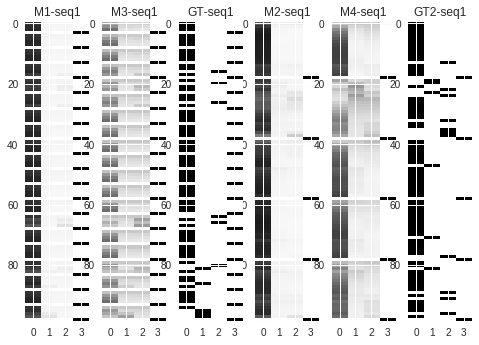

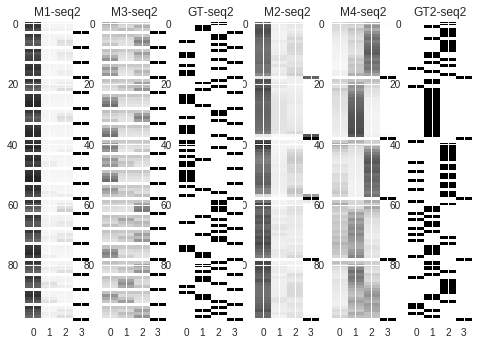

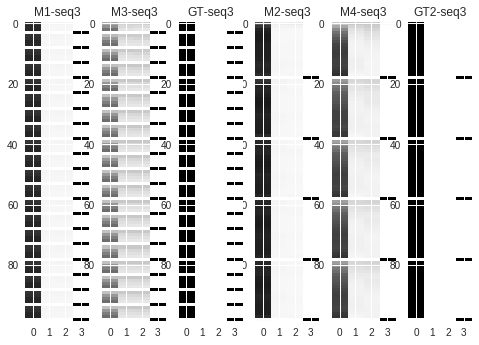

In [0]:
# Visualize performance on the test sequences:
# Visualization

def plotprob(prob,i,modelname):
  plt.subplot(1,6,i)
  plt.imshow(prob,interpolation='nearest', aspect='auto')
  ax = plt.gca()
  ax.set_xticks(np.arange(0,4,1))
  plt.title(modelname)
  
 
  
#test_seq1
seq1_GT = np.reshape(test_seq1[:,1:,:],(99,4)) #1,99,4
seq21_GT = np.reshape(test2_seq1[:,1:,:],(99,4))
seq1_m1_pred = np.reshape(y_m1_seq1[:,:-1,:],(99,4))
seq1_m3_pred = np.reshape(y_m3_seq1[:,:-1,:],(99,4))
seq1_m2_pred = np.reshape(y_m2_seq1[:,:-1,:],(99,4))
seq1_m4_pred = np.reshape(y_m4_seq1[:,:-1,:],(99,4))
plotprob(seq1_m1_pred,1,'M1-seq1') 
plotprob(seq1_m3_pred,2,'M3-seq1') 
plotprob(seq1_m2_pred,4,'M2-seq1') 
plotprob(seq1_m4_pred,5,'M4-seq1') 
plotprob(seq1_GT,3,'GT-seq1') 
plotprob(seq21_GT,6,'GT2-seq1') 
plt.show()
#test_seq2
seq2_GT = np.reshape(test_seq2[:,1:,:],(99,4)) #1,99,4
seq22_GT = np.reshape(test2_seq2[:,1:,:],(99,4))
seq2_m1_pred = np.reshape(y_m1_seq2[:,:-1,:],(99,4))
seq2_m3_pred = np.reshape(y_m3_seq2[:,:-1,:],(99,4))
seq2_m2_pred = np.reshape(y_m2_seq2[:,:-1,:],(99,4))
seq2_m4_pred = np.reshape(y_m4_seq2[:,:-1,:],(99,4))
plotprob(seq2_m1_pred,1,'M1-seq2') 
plotprob(seq2_m3_pred,2,'M3-seq2') 
plotprob(seq2_m2_pred,4,'M2-seq2') 
plotprob(seq2_m4_pred,5,'M4-seq2') 
plotprob(seq2_GT,3,'GT-seq2') 
plotprob(seq22_GT,6,'GT2-seq2') 
plt.show()

#test_seq3
seq3_GT = np.reshape(test_seq3[:,1:,:],(99,4))#1,99,4
seq23_GT = np.reshape(test2_seq3[:,1:,:],(99,4))
seq3_m1_pred = np.reshape(y_m1_seq3[:,:-1,:],(99,4))
seq3_m3_pred = np.reshape(y_m3_seq3[:,:-1,:],(99,4))
seq3_m2_pred = np.reshape(y_m2_seq3[:,:-1,:],(99,4))
seq3_m4_pred = np.reshape(y_m4_seq3[:,:-1,:],(99,4))
plotprob(seq3_m1_pred,1,'M1-seq3') 
plotprob(seq3_m3_pred,2,'M3-seq3') 
plotprob(seq3_m2_pred,4,'M2-seq3') 
plotprob(seq3_m4_pred,5,'M4-seq3') 
plotprob(seq3_GT,3,'GT-seq3') 
plotprob(seq23_GT,6,'GT2-seq3') 
plt.show()

  


### Bayesian Updates

In [0]:
# Implement Bayesian update (as if you knew the 'right' prior and model)
time_step = 100
#test_seq1 [64,100,4]
#prior
alpha = np.array([[10.,1.,1.],[1.3,1.3,1.3]])
p = np.array([1.0, 0.0, 0.0])
batch_size = 1

def bayesianInference(alpha,seq):
  xs = seq[:,:,:-1]
  posterior = np.zeros((batch_size,time_step,4))
  sum_x = np.zeros((3))
  for i in range(batch_size):
    for t in range(time_step):
      if np.sum(xs[i,t,:]) == 0:
        sum_x = np.zeros((3))
        posterior[i,t-1,3] = 1
      else:
        sum_x = sum_x + xs[i,t,:]
        post_alpha = alpha+sum_x
        p = np.random.dirichlet(post_alpha,1)[0]
        posterior[i,t,:3] = p
  return posterior

#test_seq1:
seq1_post = bayesianInference(alpha[0],test2_seq1)
#test_seq2
seq2_post = bayesianInference(alpha[1],test2_seq2)
#test_seq3
seq3_post1 = bayesianInference(alpha[0],test2_seq3)
seq3_post2 = bayesianInference(alpha[1],test2_seq3)

# From the posterior infer the mean of the probability vector. Use this as your 
# estimate to compare again the LSTM predictions


In [0]:
seq1_post.shape

(1, 100, 4)

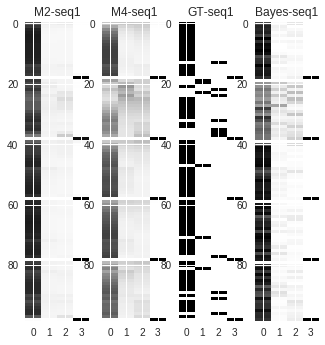

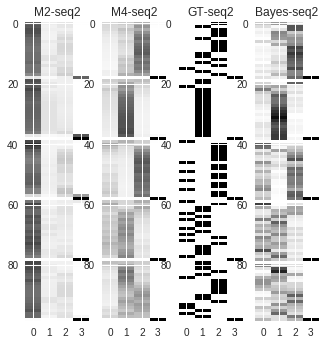

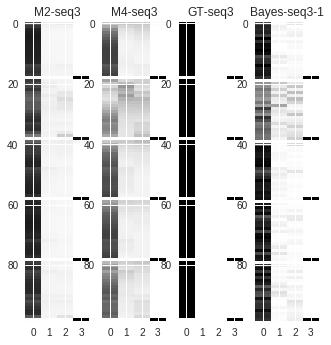

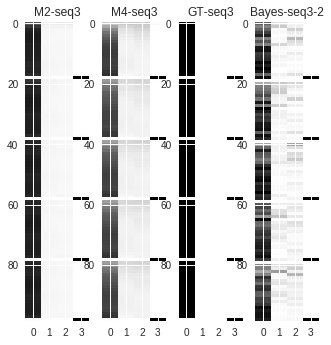

In [0]:
# Visualize and compare performance on the test sequences:
#test_seq1
seq21_GT = np.reshape(test2_seq1[:,1:,:],(99,4))
seq1_m2_pred = np.reshape(y_m2_seq1[:,:-1,:],(99,4))
seq1_m4_pred = np.reshape(y_m4_seq1[:,:-1,:],(99,4))
seq1_bayes = np.reshape(seq1_post[:,:-1,:],(99,4))
plotprob(seq1_m2_pred,1,'M2-seq1') 
plotprob(seq1_m4_pred,2,'M4-seq1') 
plotprob(seq21_GT,3,'GT-seq1') 
plotprob(seq1_bayes,4,'Bayes-seq1')  
plt.show()
#test_seq2
seq22_GT = np.reshape(test2_seq2[:,1:,:],(99,4))
seq2_m2_pred = np.reshape(y_m2_seq2[:,:-1,:],(99,4))
seq2_m4_pred = np.reshape(y_m4_seq2[:,:-1,:],(99,4))
seq2_bayes = np.reshape(seq2_post[:,:-1,:],(99,4))
plotprob(seq2_m2_pred,1,'M2-seq2') 
plotprob(seq2_m4_pred,2,'M4-seq2') 
plotprob(seq22_GT,3,'GT-seq2') 
plotprob(seq2_bayes,4,'Bayes-seq2') 
plt.show()
#test_seq3-1
seq23_GT = np.reshape(test2_seq3[:,1:,:],(99,4))
seq3_m2_pred = np.reshape(y_m2_seq3[:,:-1,:],(99,4))
seq3_m4_pred = np.reshape(y_m4_seq3[:,:-1,:],(99,4))
seq3_bayes = np.reshape(seq3_post1[:,:-1,:],(99,4))
plotprob(seq1_m2_pred,1,'M2-seq3') 
plotprob(seq1_m4_pred,2,'M4-seq3') 
plotprob(seq23_GT,3,'GT-seq3') 
plotprob(seq1_bayes,4,'Bayes-seq3-1') 
plt.show()
#test_seq3-2
seq23_GT = np.reshape(test2_seq3[:,1:,:],(99,4))
seq3_m2_pred = np.reshape(y_m2_seq3[:,:-1,:],(99,4))
seq3_m4_pred = np.reshape(y_m4_seq3[:,:-1,:],(99,4))
seq3_bayes2 = np.reshape(seq3_post2[:,:-1,:],(99,4))
plotprob(seq3_m2_pred,1,'M2-seq3') 
plotprob(seq3_m4_pred,2,'M4-seq3') 
plotprob(seq23_GT,3,'GT-seq3') 
plotprob(seq3_bayes2,4,'Bayes-seq3-2')
plt.show()

[None, None, None]